In [1]:
import sys
sys.path.insert(1, '/home/kang/PycharmProjects/brg_github/braingeneerspy')
from braingeneers import analysis
import numpy as np

In [4]:
# path = "/media/kang/Seagate_External/temp_data/Trace_20221209_11_38_20_chip1400_curated_c1.zip"
base_folder = "/media/kang/Seagate_External/temp_data/nwb_test/"
path = base_folder + "hc3.28_hckcr1_chip16835_plated34.2_rec4.2_phy.zip"
nwb_phy_path = base_folder + "hc3.28_hckcr1_chip16835_plated34.2_rec4.2_phy_nwb.zip"
spike_data = analysis.load_spike_data(uuid="", full_path=path, 
                                      groups_to_load=[np.nan])
spike_data_nwb = analysis.load_spike_data(uuid="", full_path=nwb_phy_path, 
                                      groups_to_load=[np.nan])

In [17]:
print(spike_data.N)
print(spike_data_nwb.N)
print([len(t) for t in spike_data.train] == [len(t) for t in spike_data_nwb.train])
neuron_data = spike_data.neuron_attributes[10].cluster_id
neuron_data_nwb = spike_data_nwb.neuron_attributes[10].cluster_id
print(neuron_data)
print(neuron_data_nwb)

227
227
True
10
10


In [11]:
print(spike_data.neuron_attributes[1].cluster_id)
print(len(spike_data.neuron_attributes[1].neighbor_channels))
print(spike_data.neuron_attributes[1].neighbor_templates.shape)
print(spike_data.neuron_attributes[1].template.shape)

9
12
(12, 82)
(82,)


In [15]:
spike_data.neuron_attributes[1].template == spike_data.neuron_attributes[1].neighbor_templates[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

/tmp/ipykernel_1157549/4099764378.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


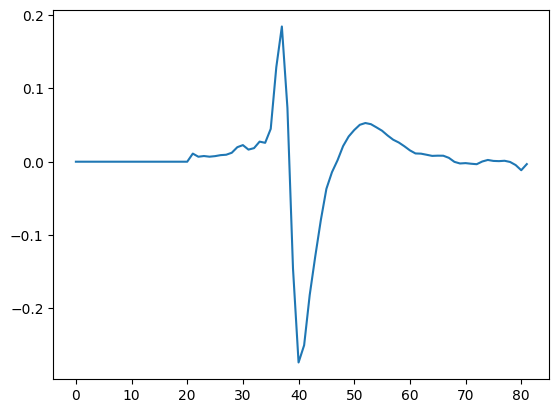

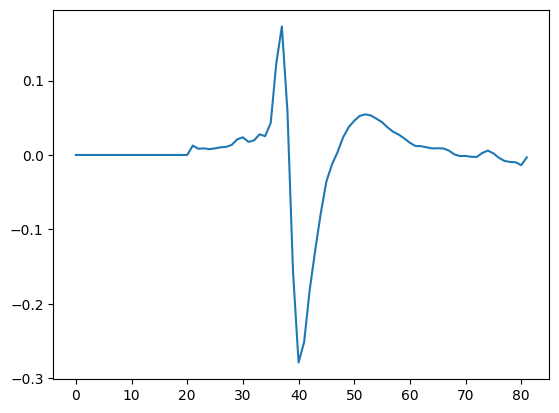

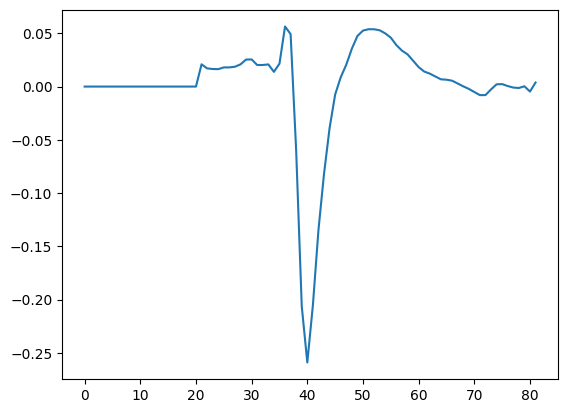

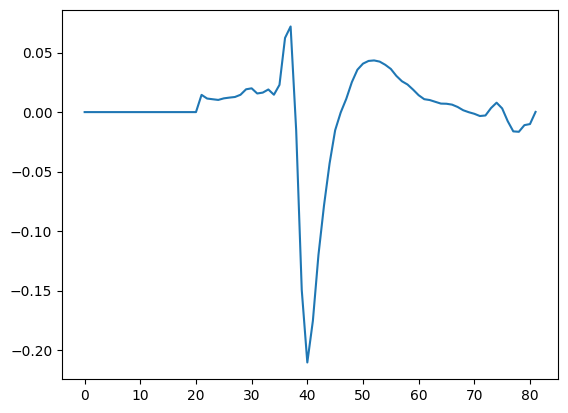

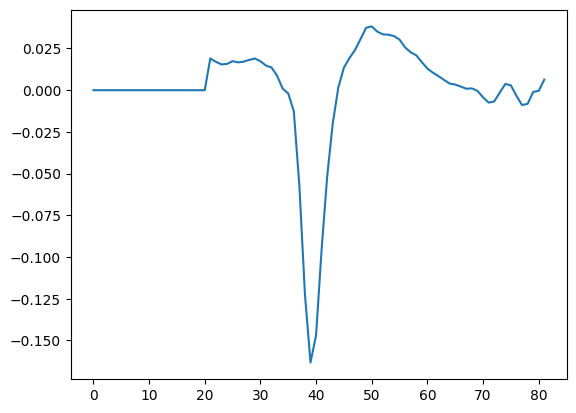

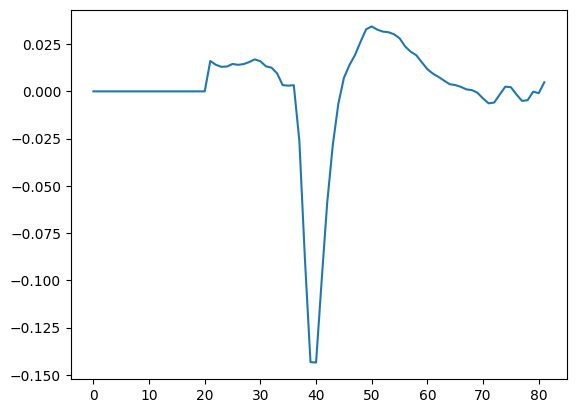

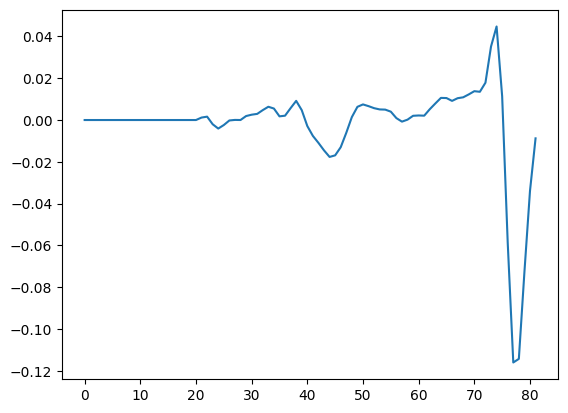

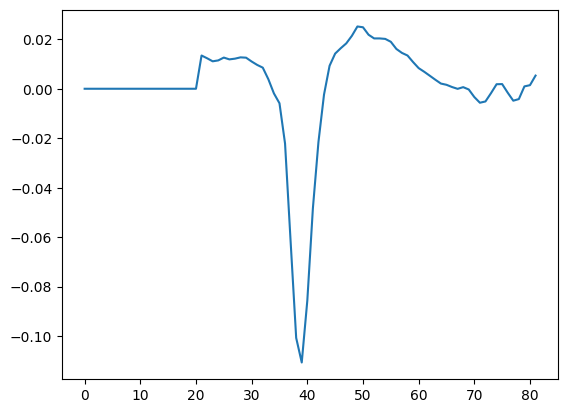

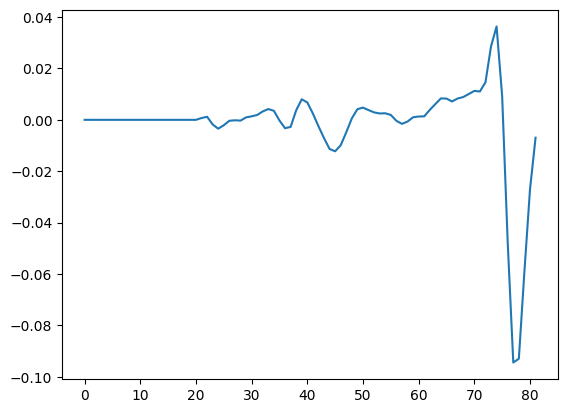

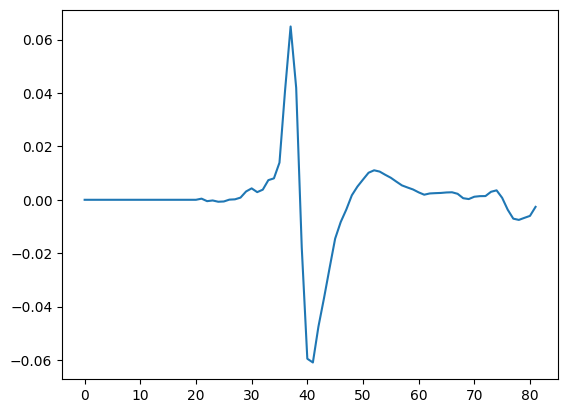

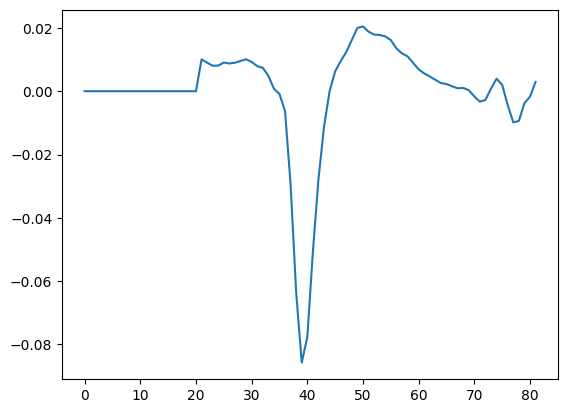

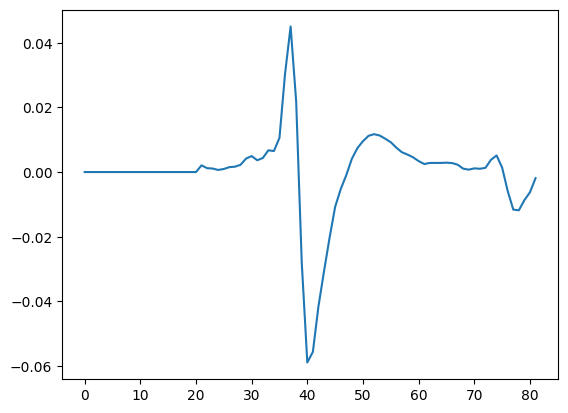

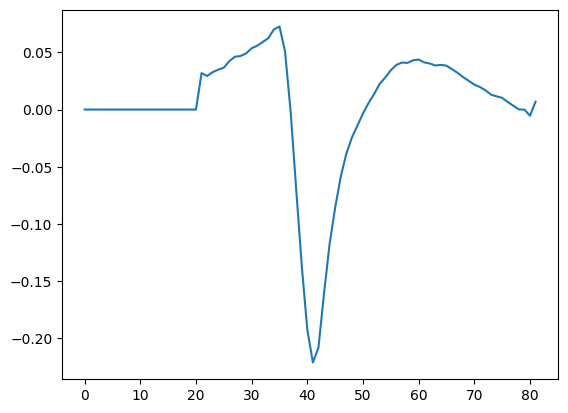

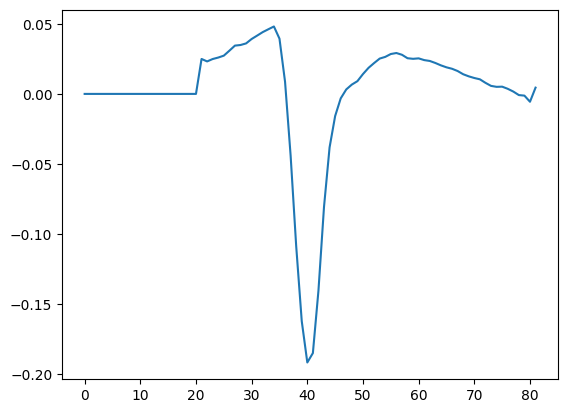

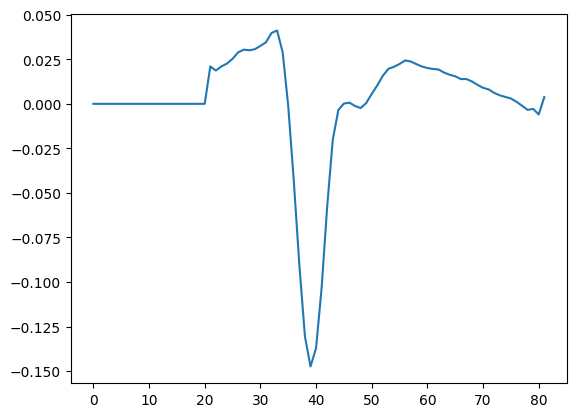

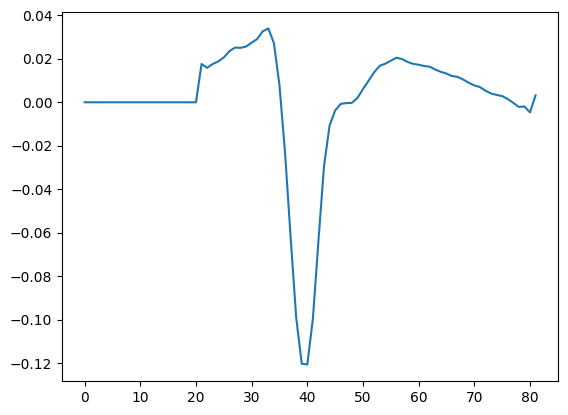

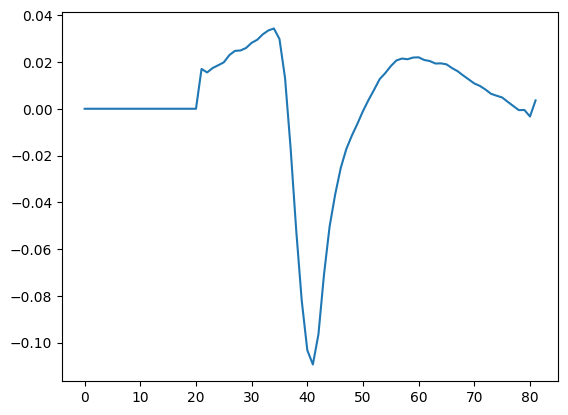

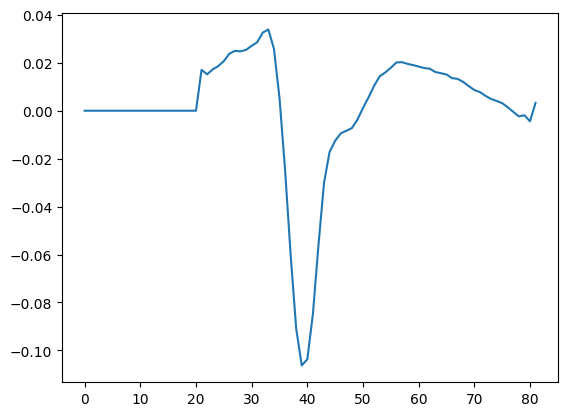

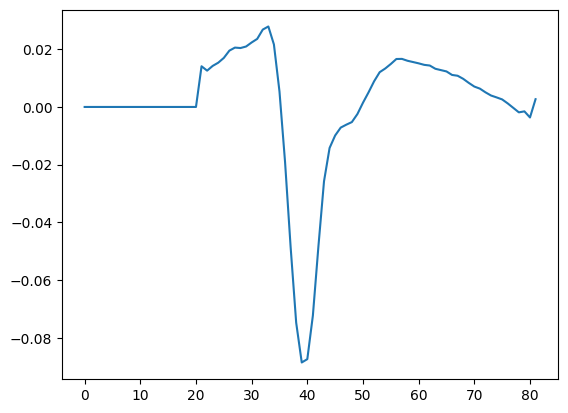

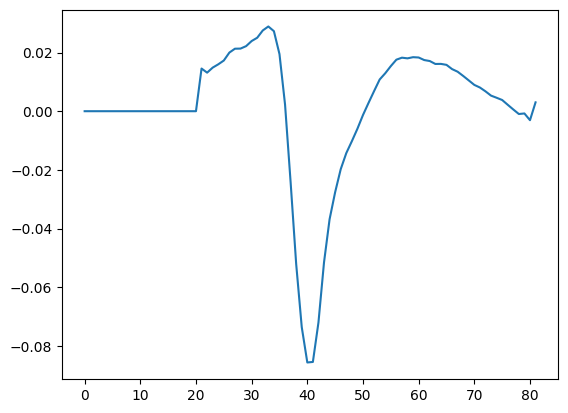

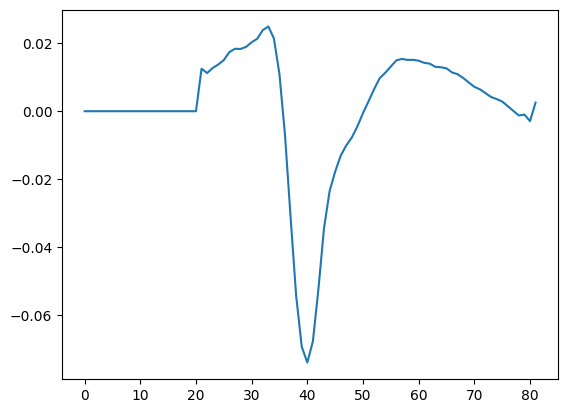

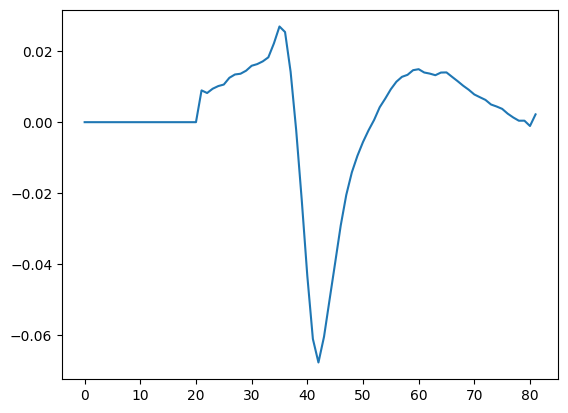

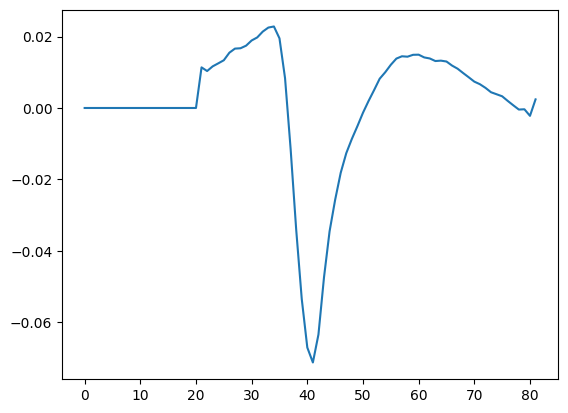

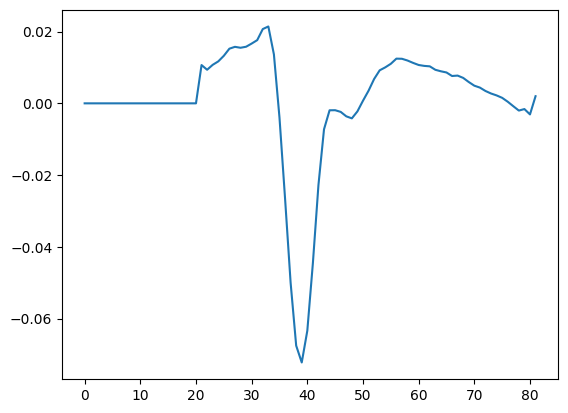

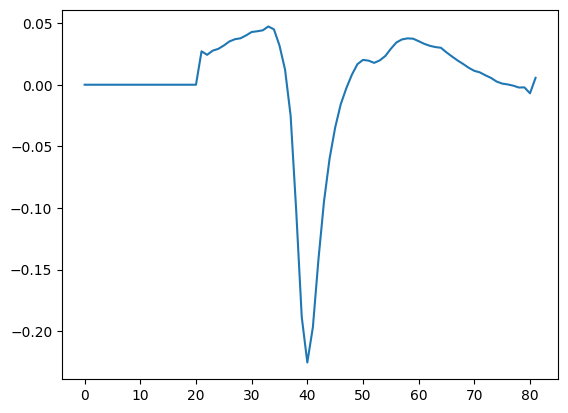

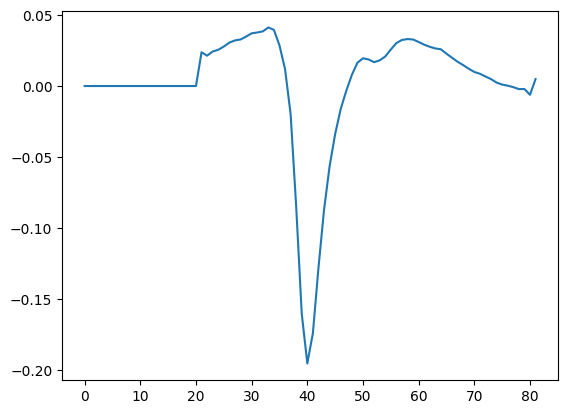

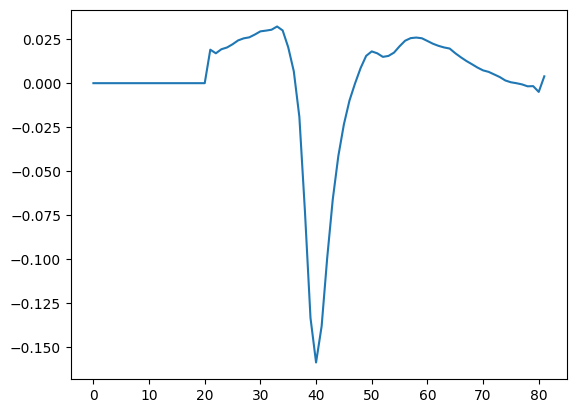

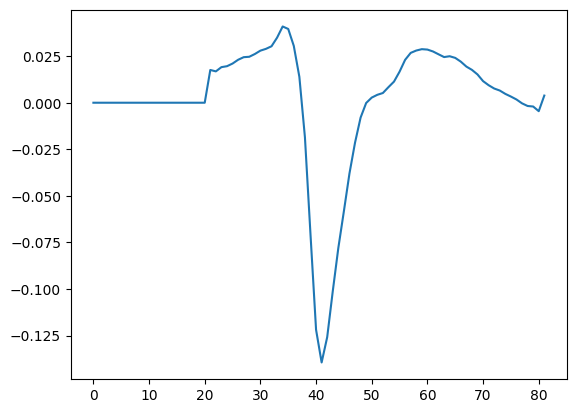

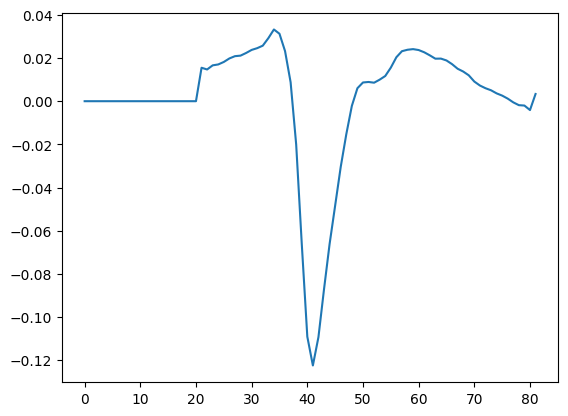

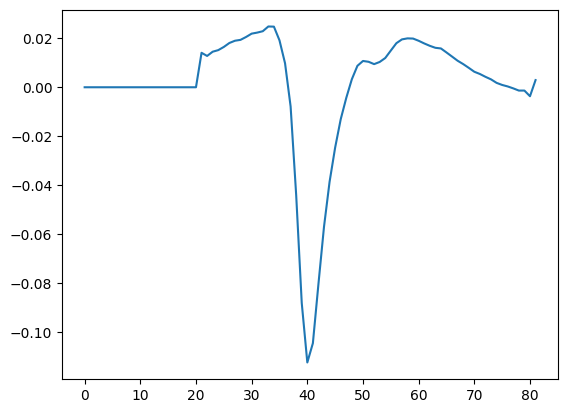

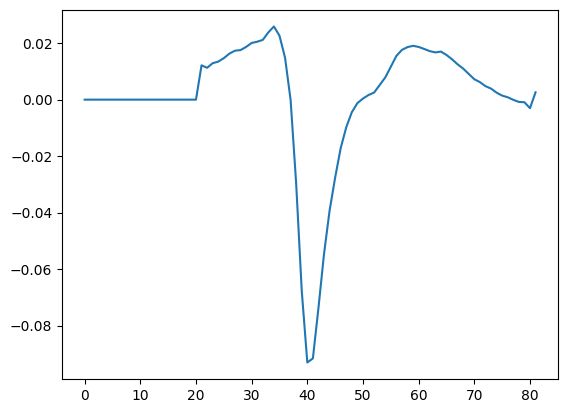

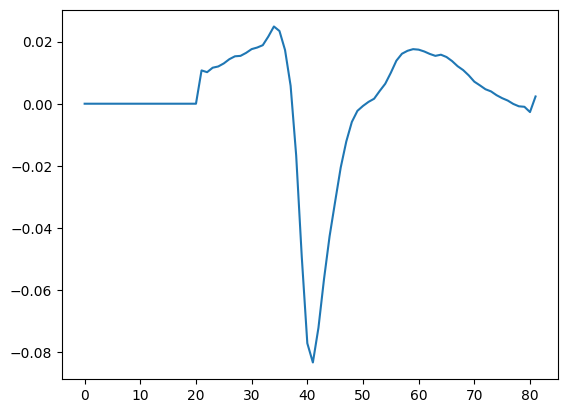

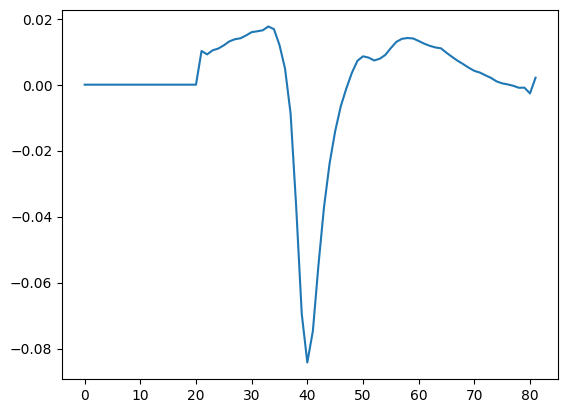

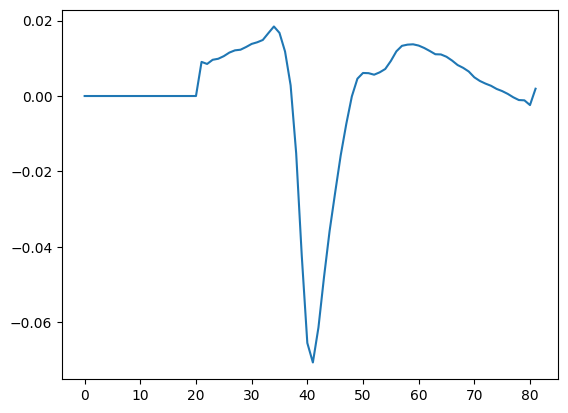

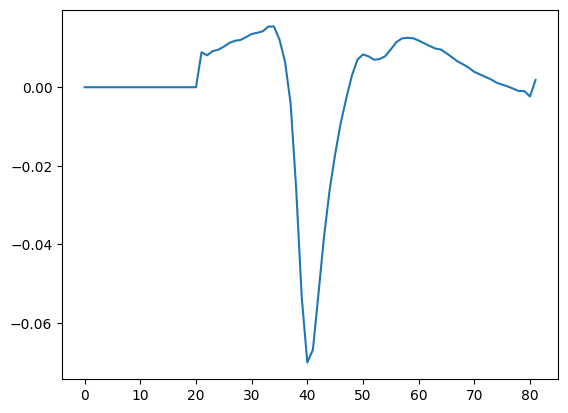

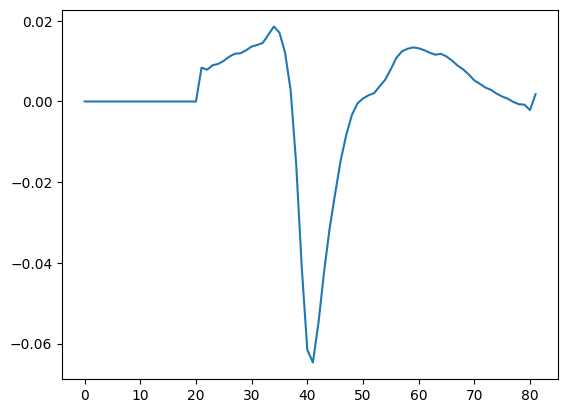

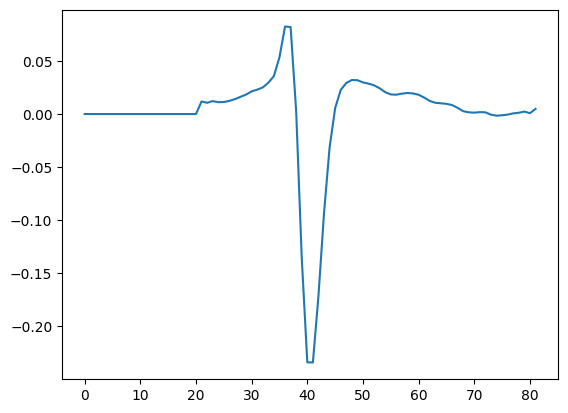

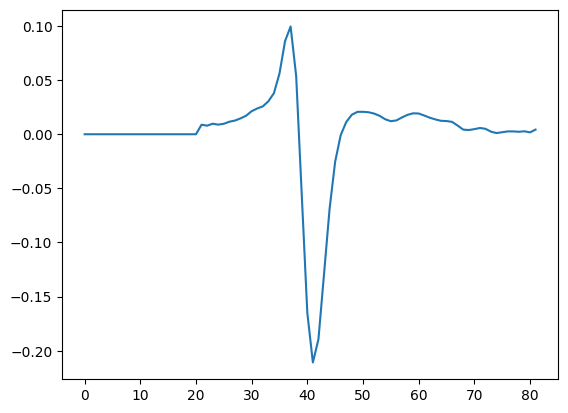

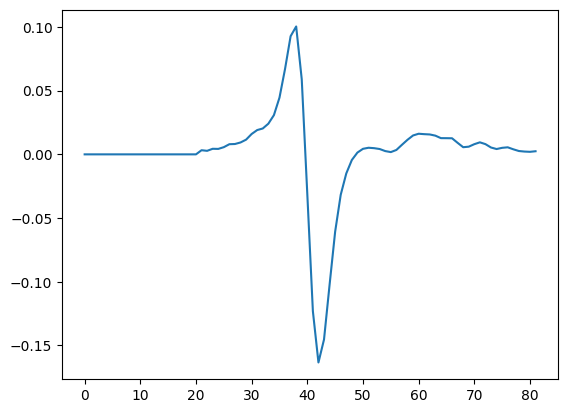

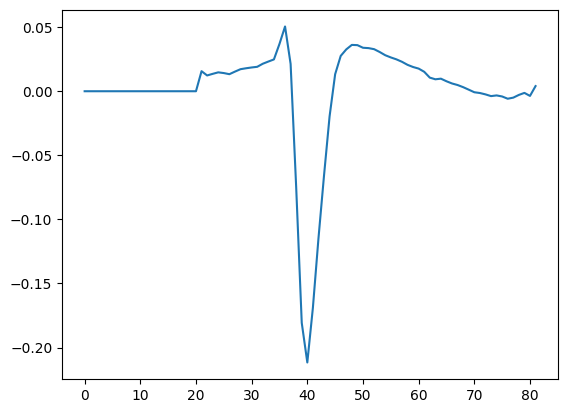

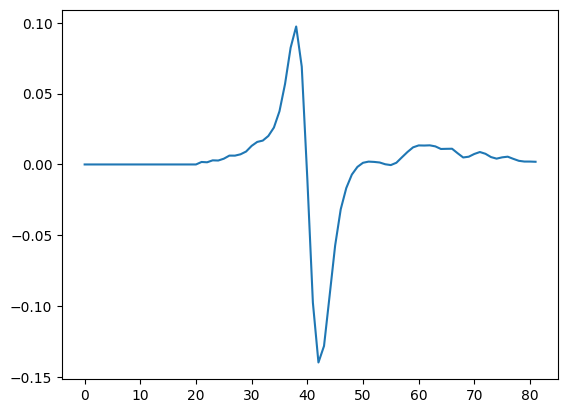

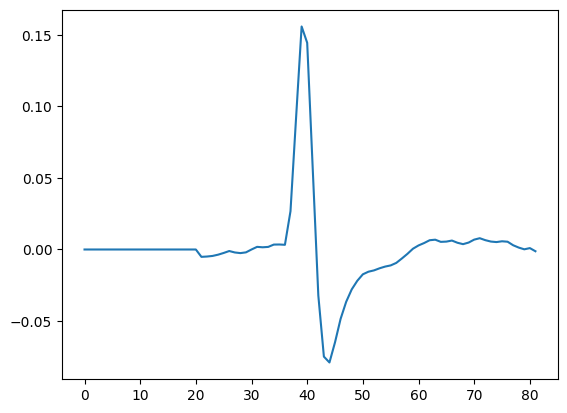

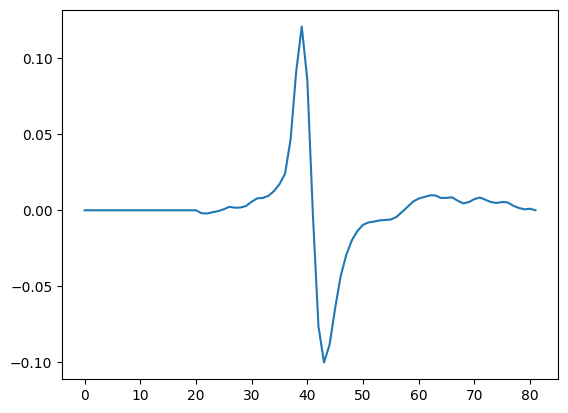

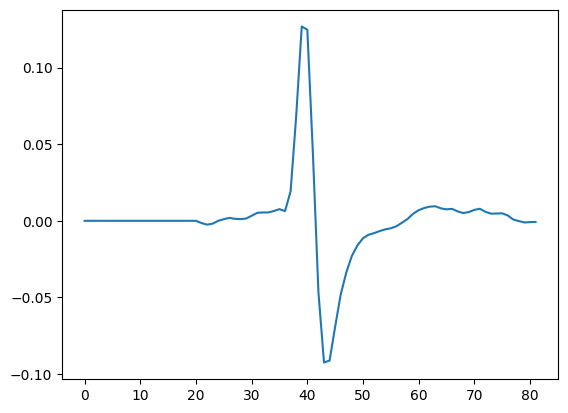

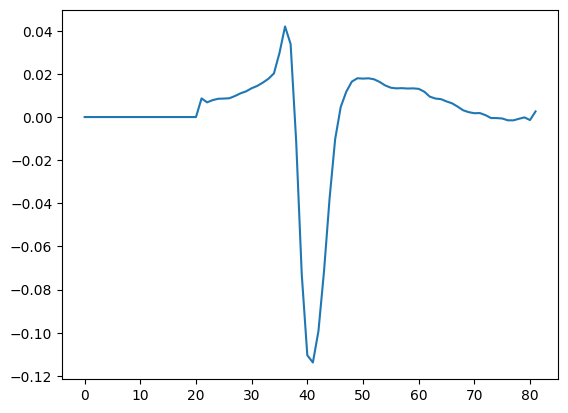

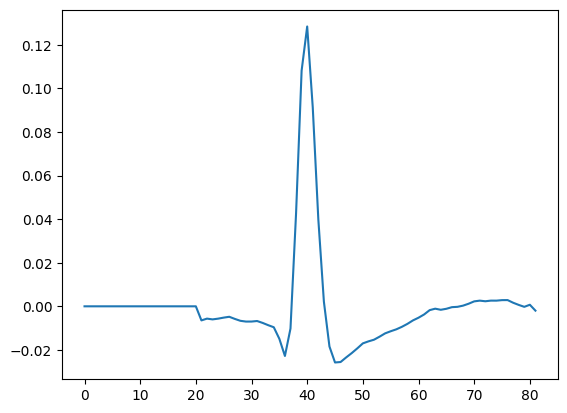

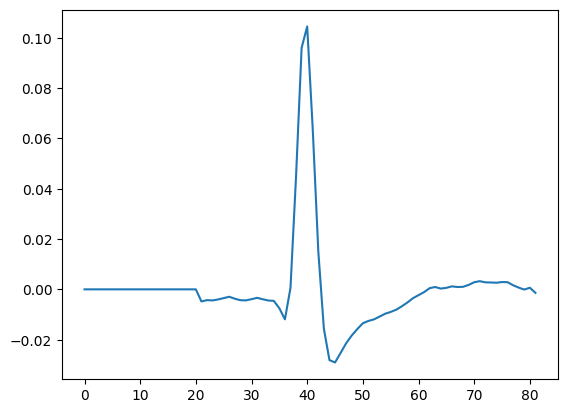

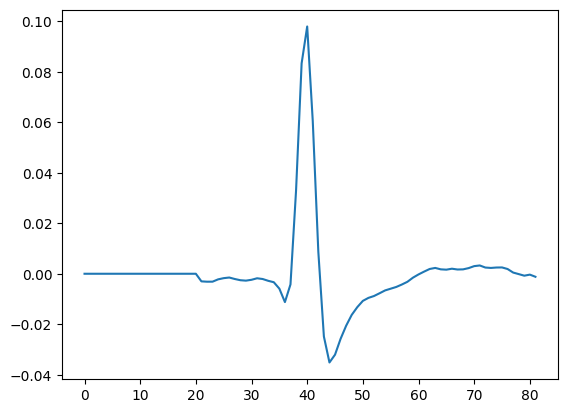

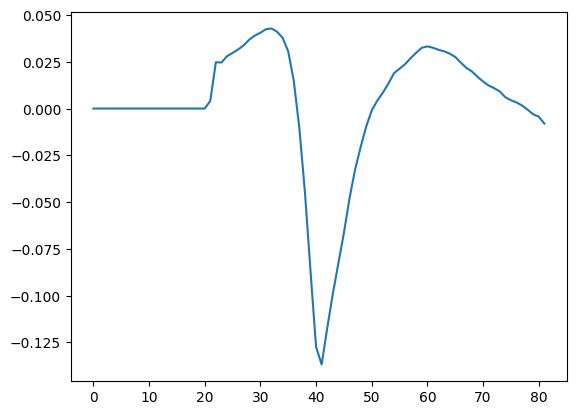

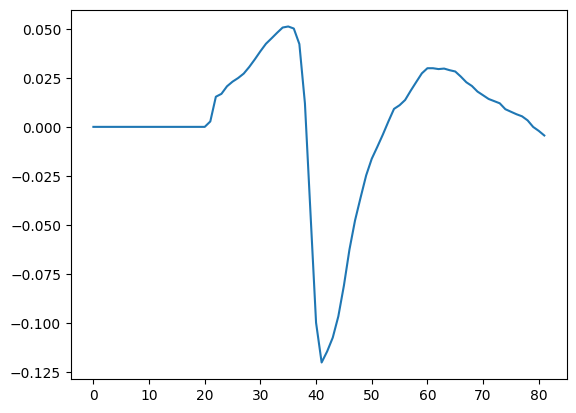

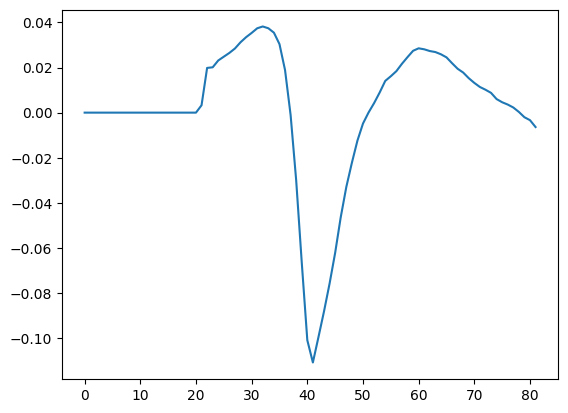

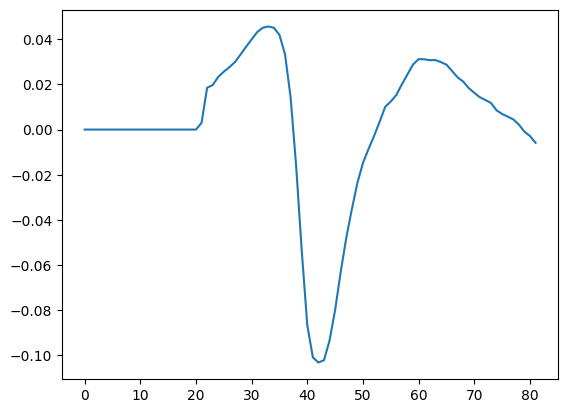

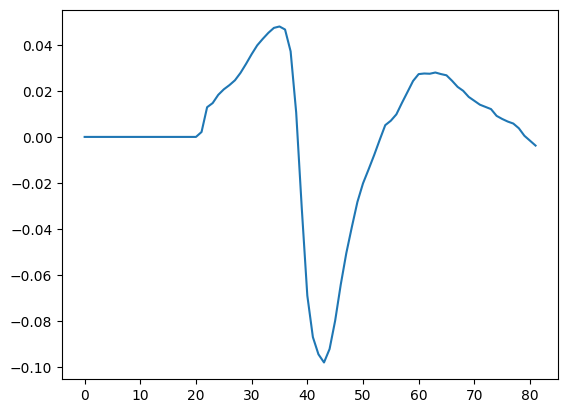

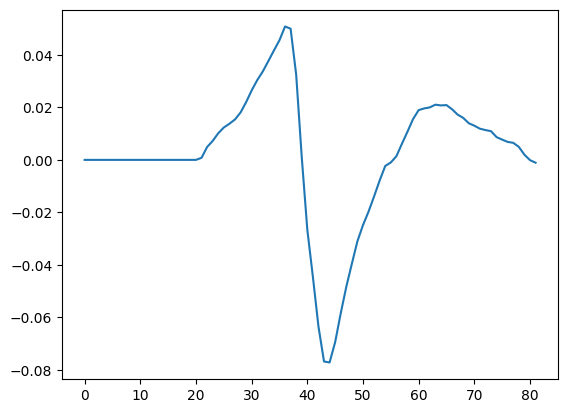

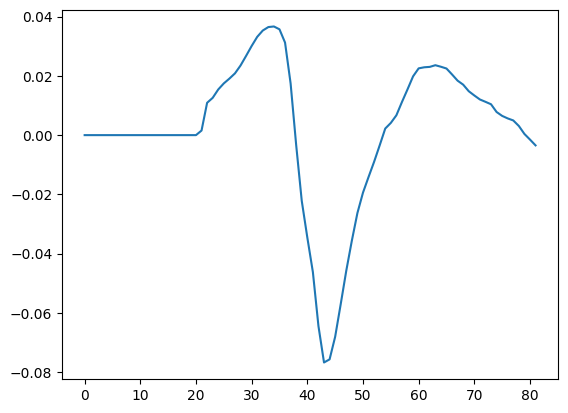

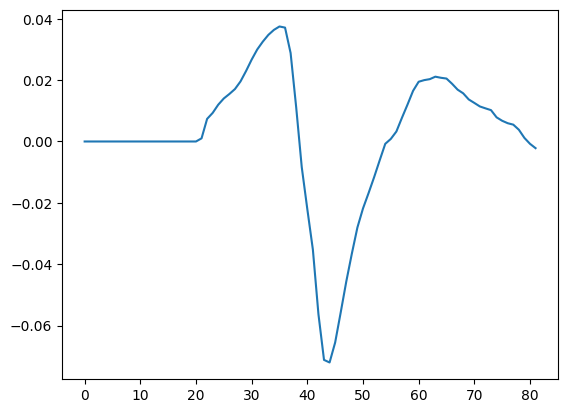

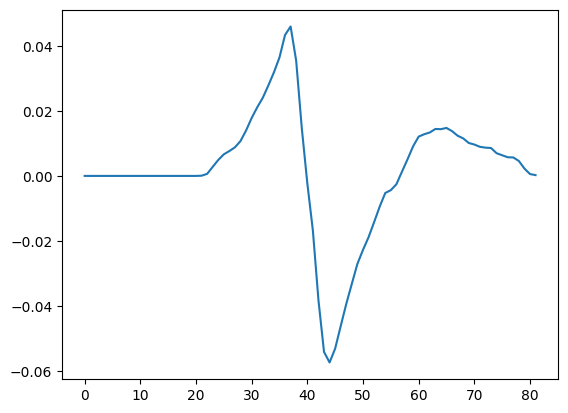

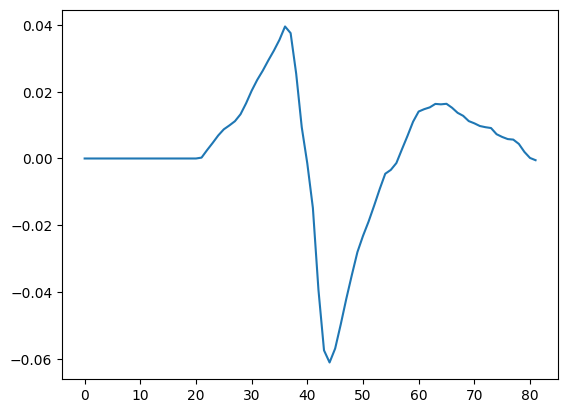

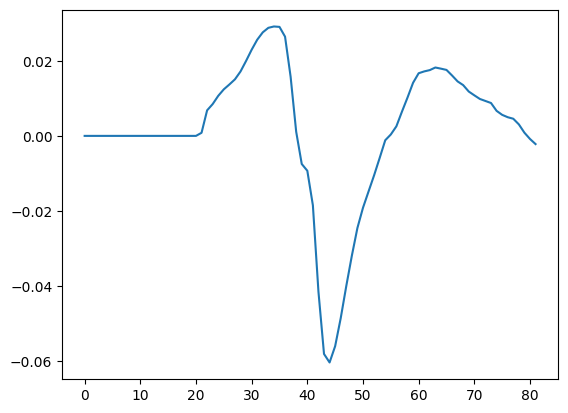

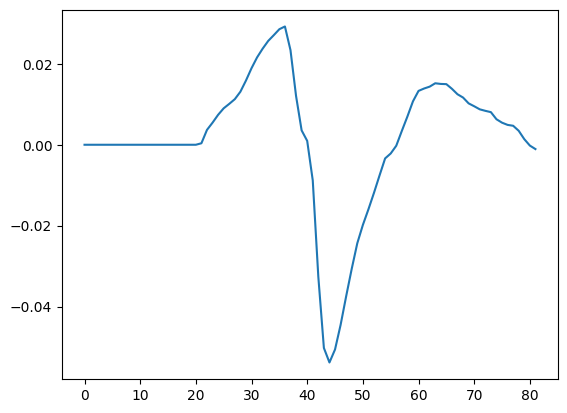

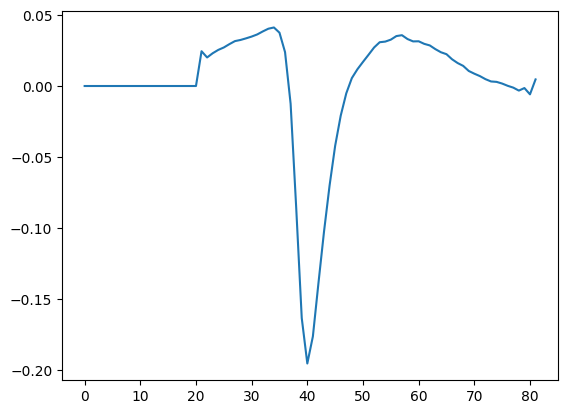

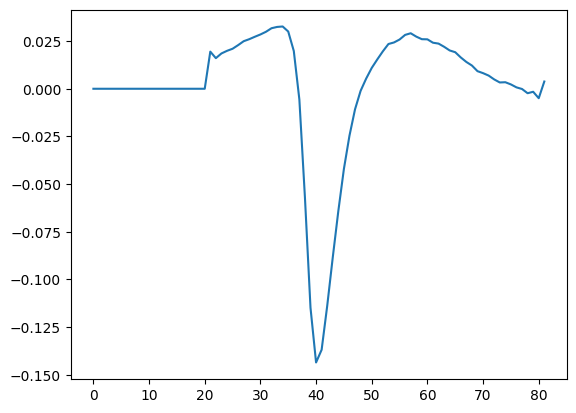

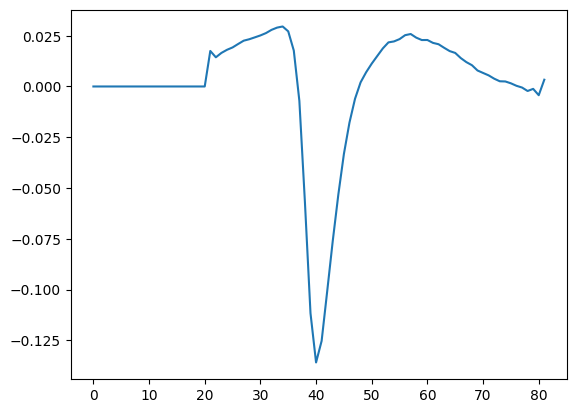

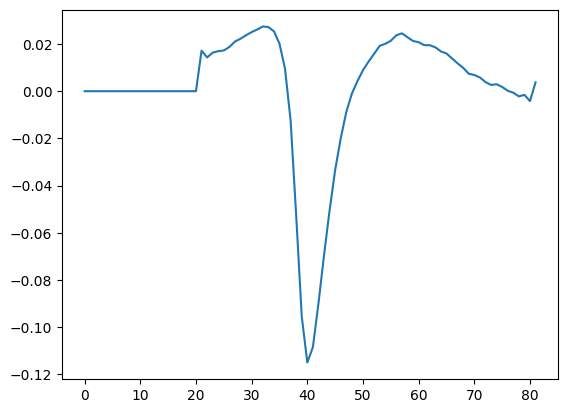

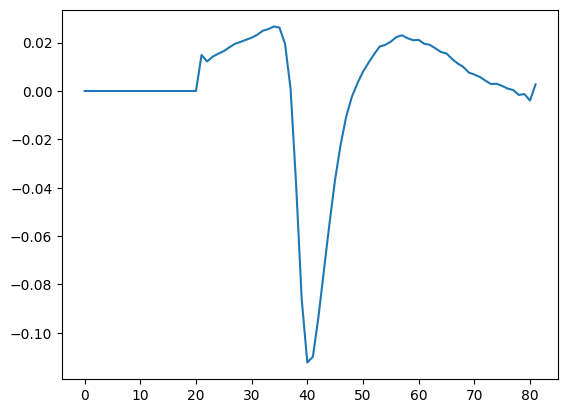

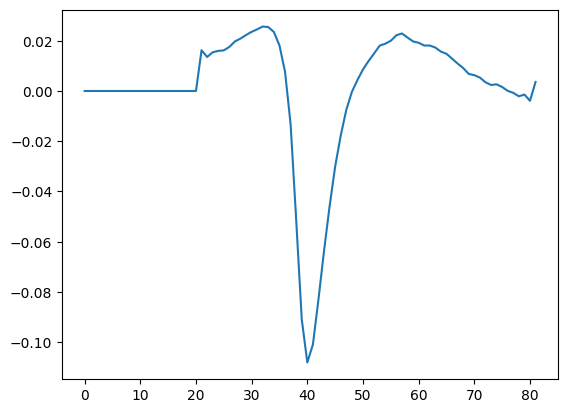

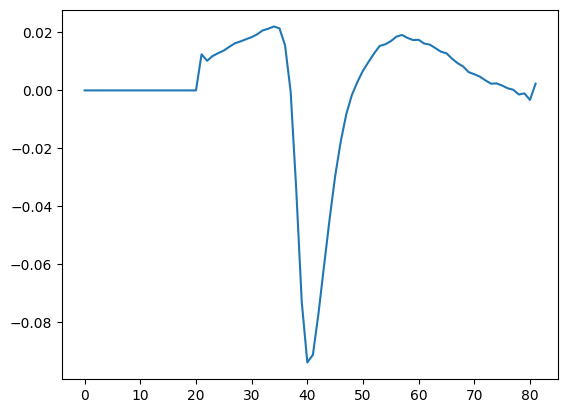

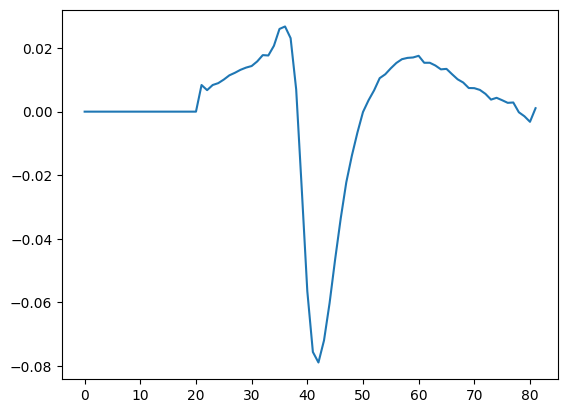

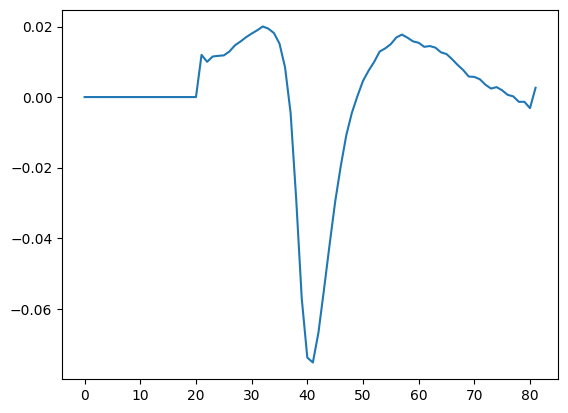

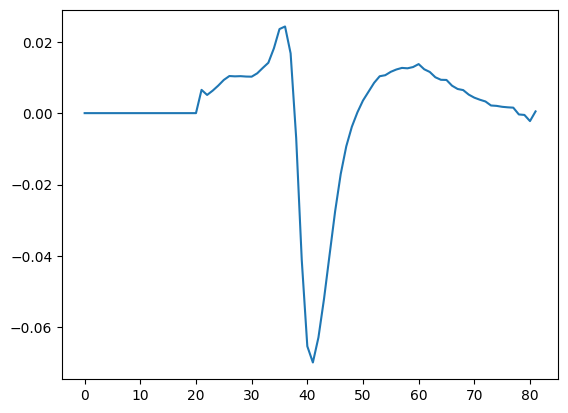

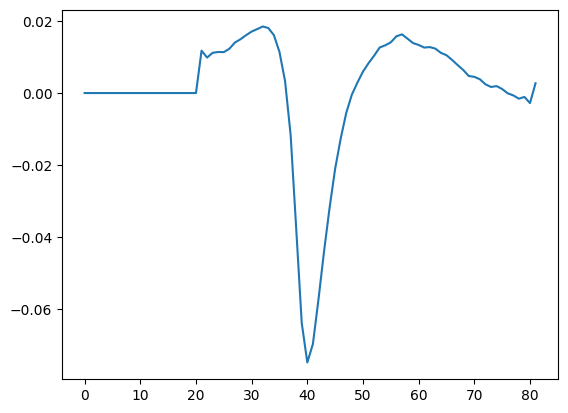

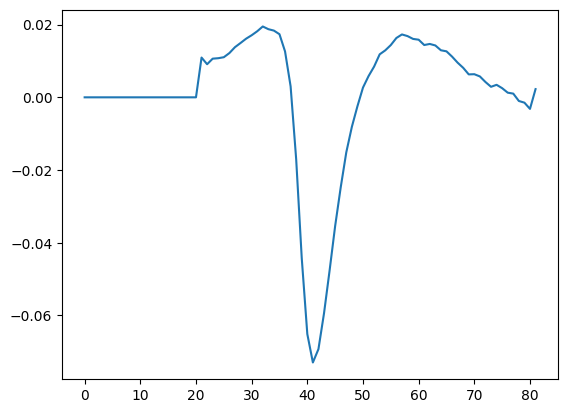

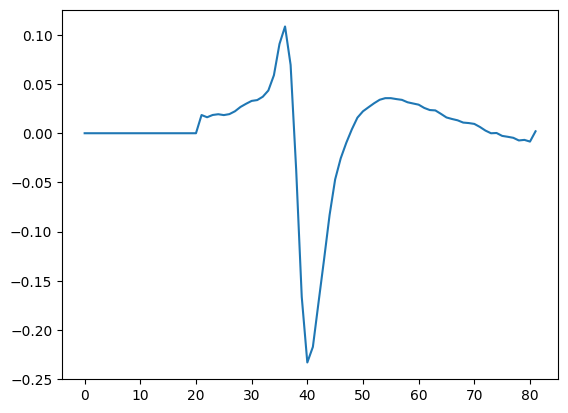

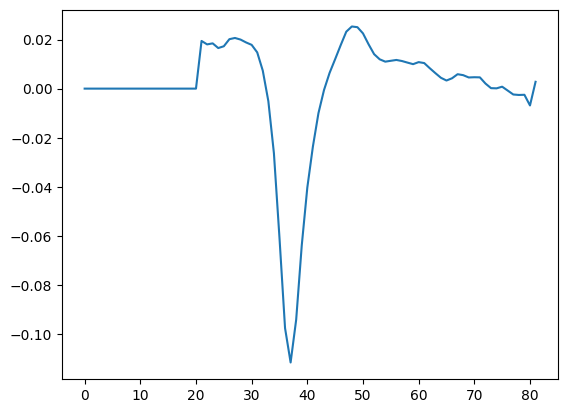

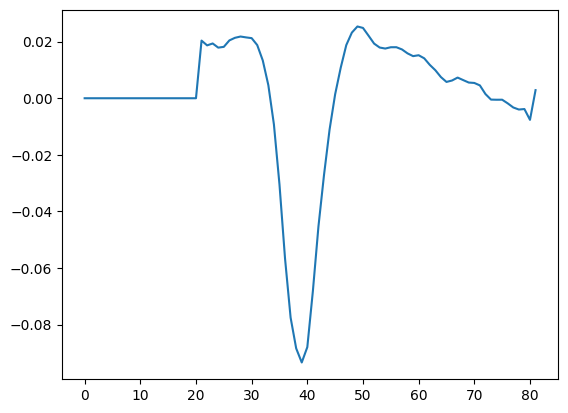

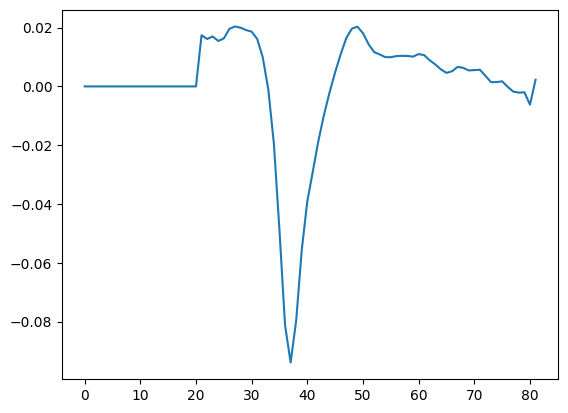

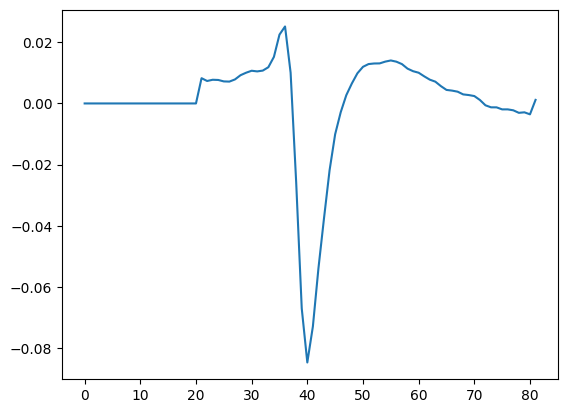

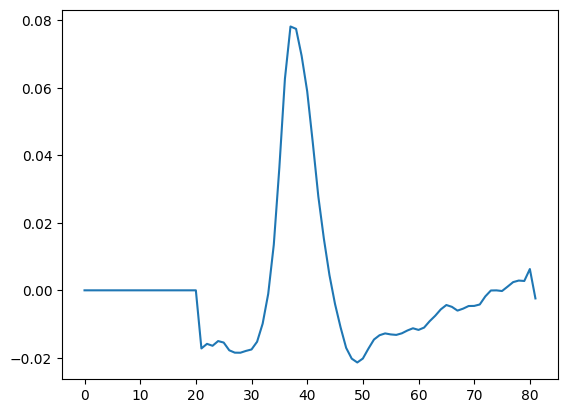

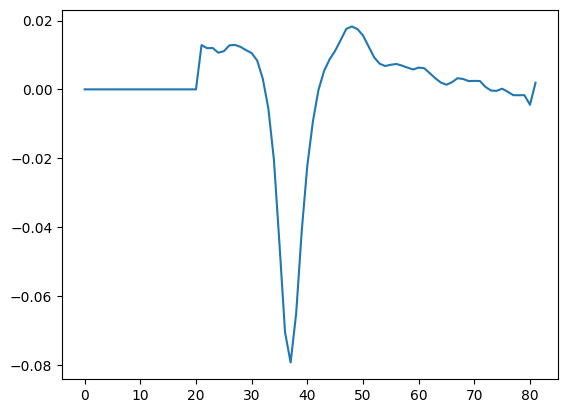

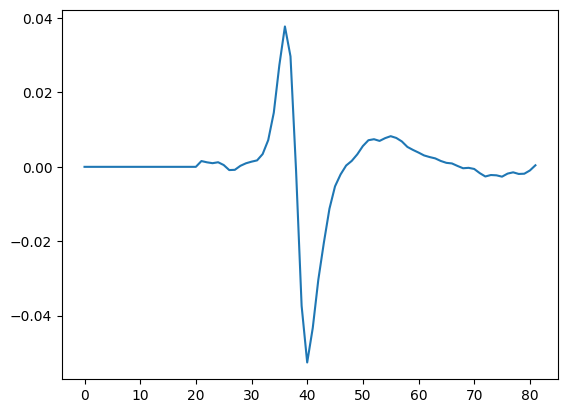

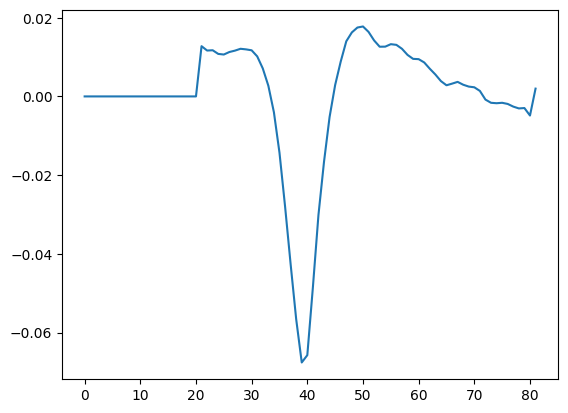

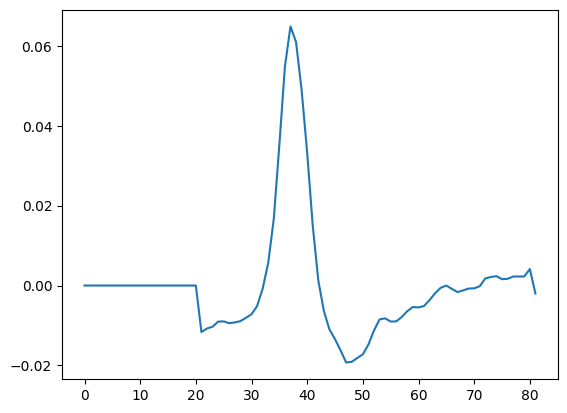

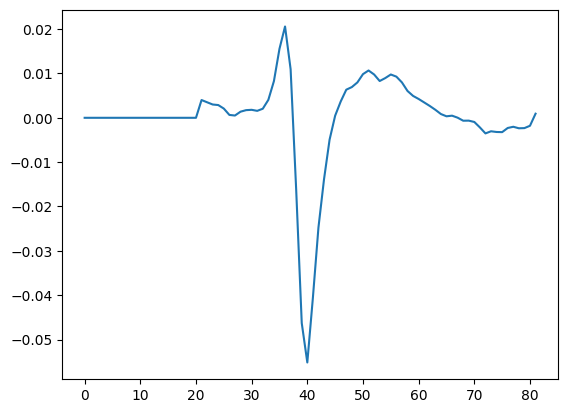

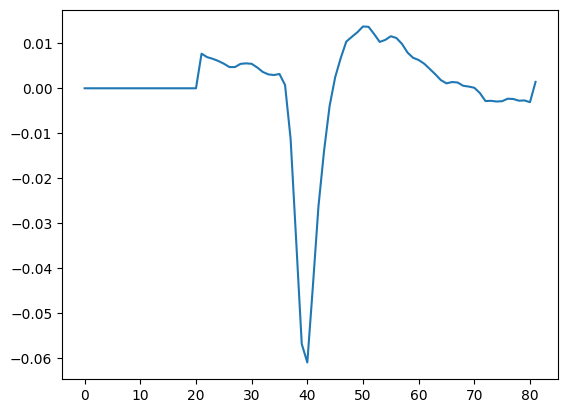

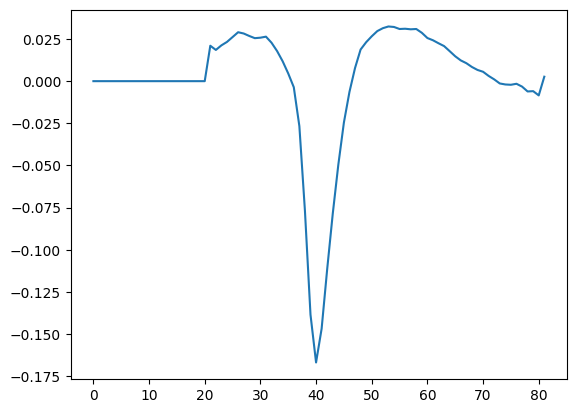

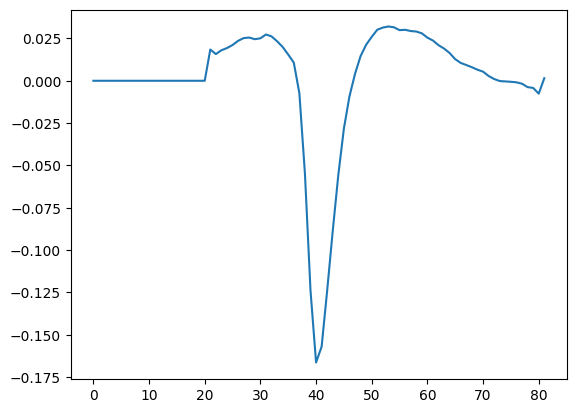

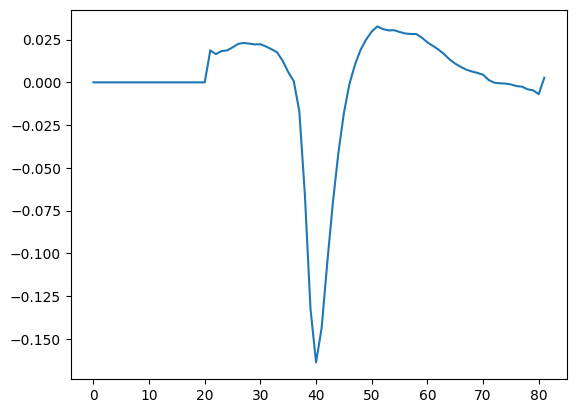

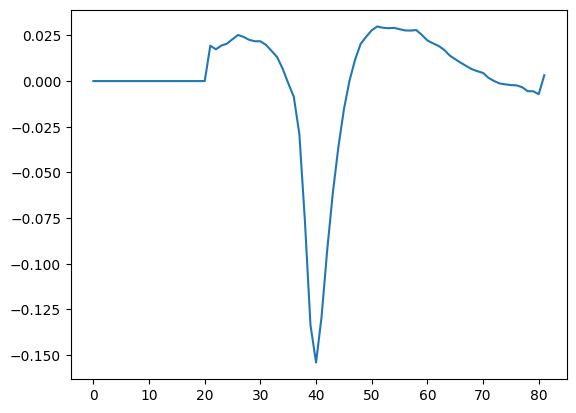

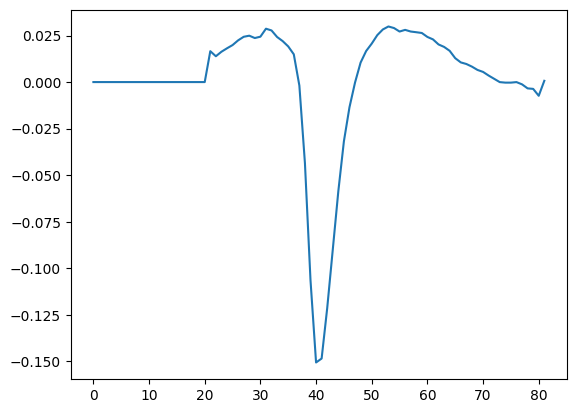

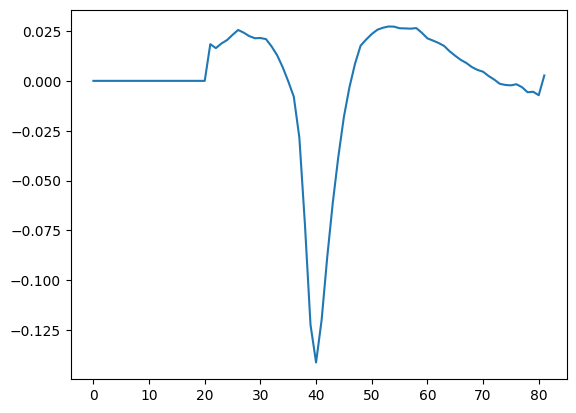

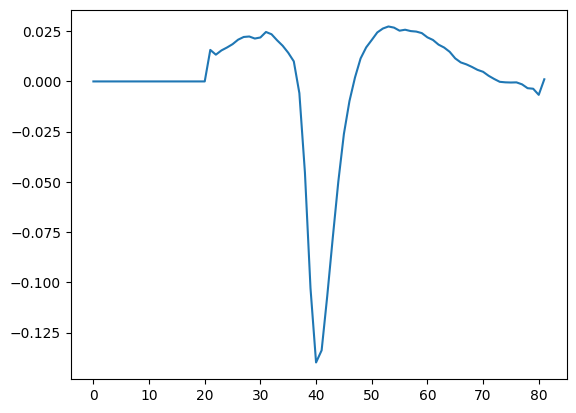

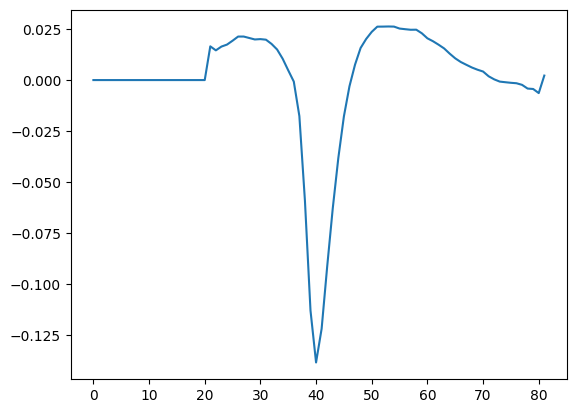

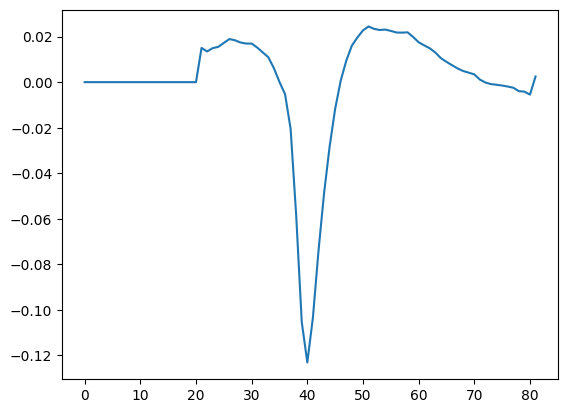

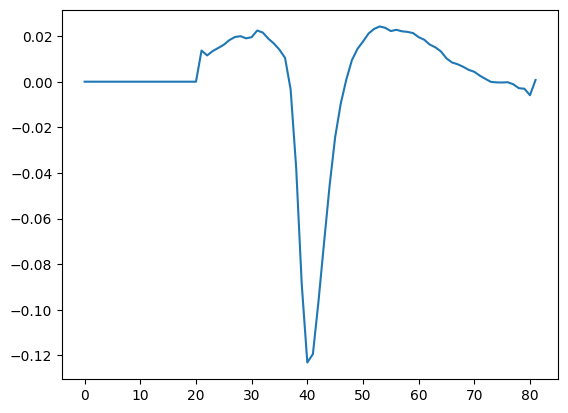

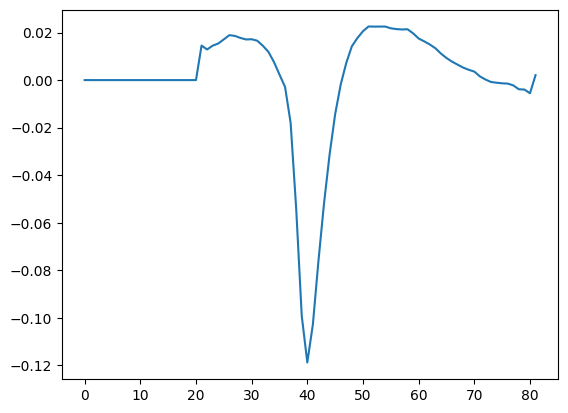

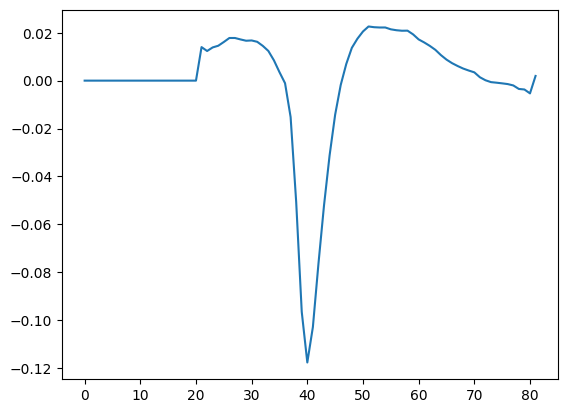

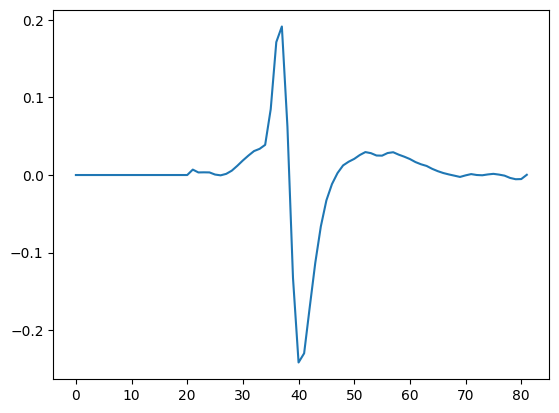

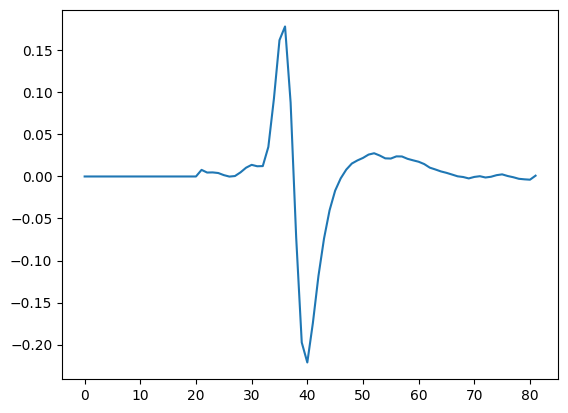

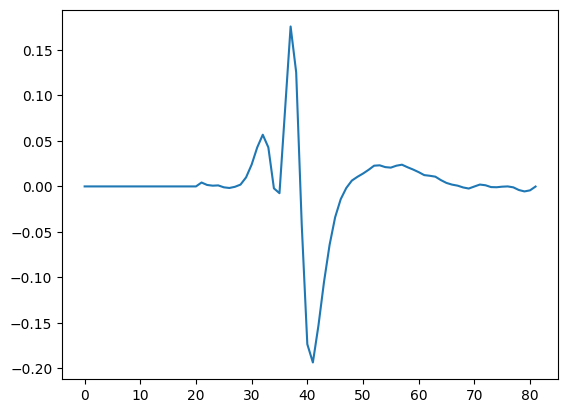

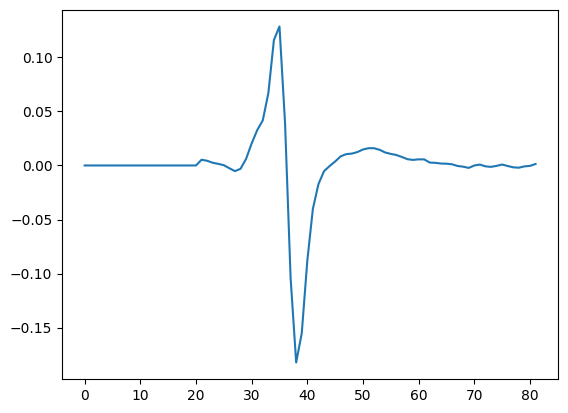

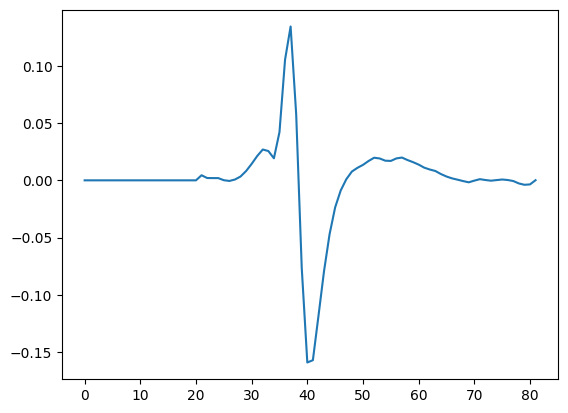

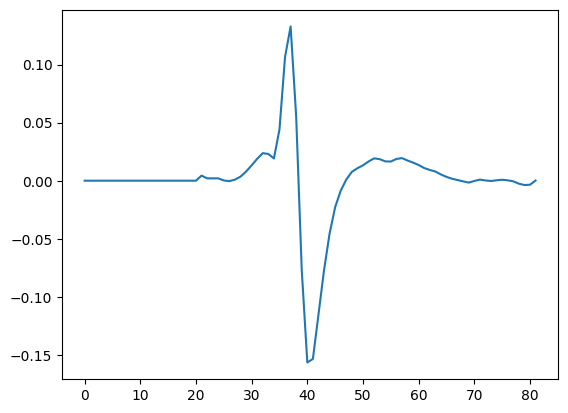

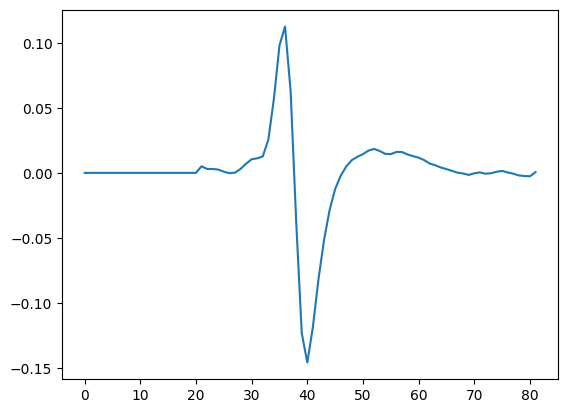

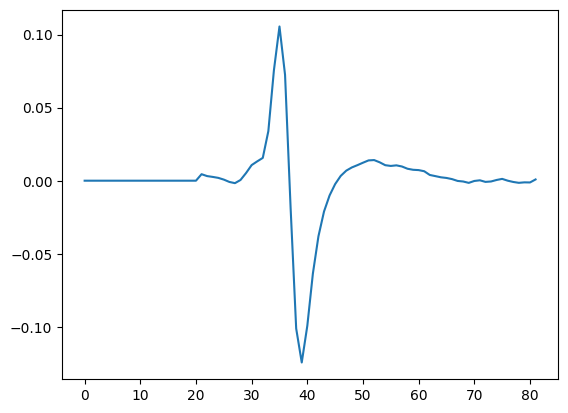

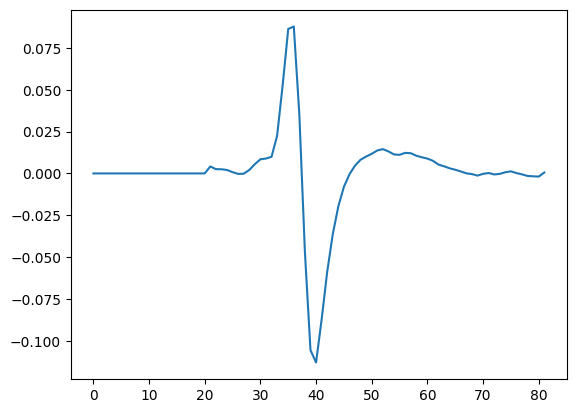

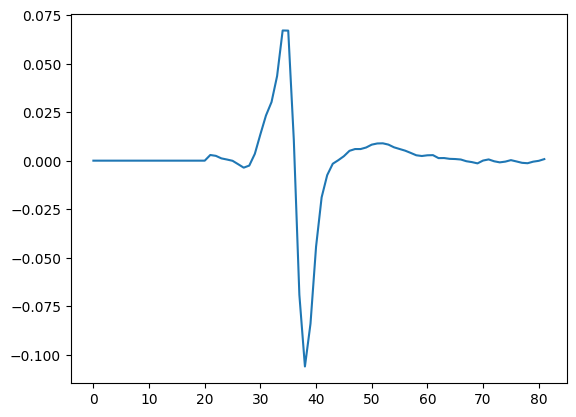

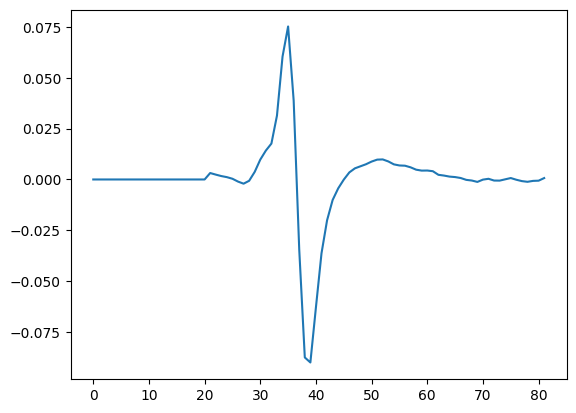

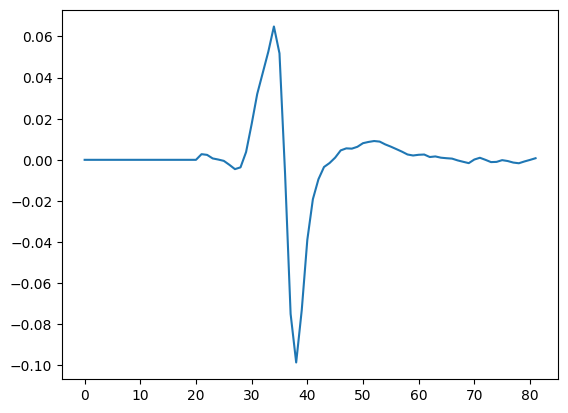

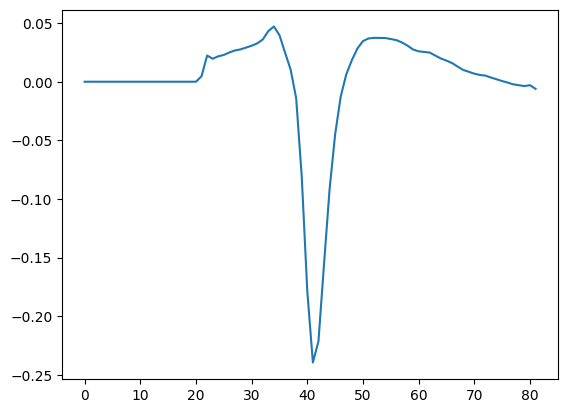

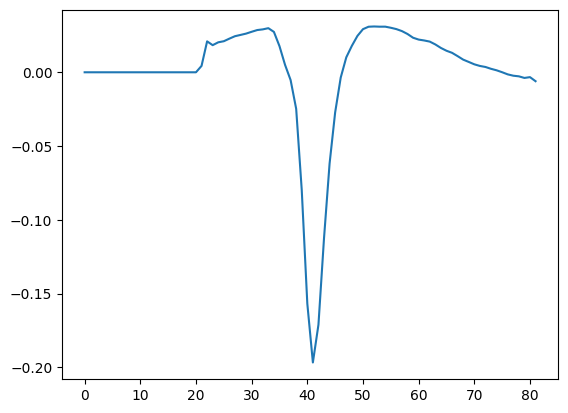

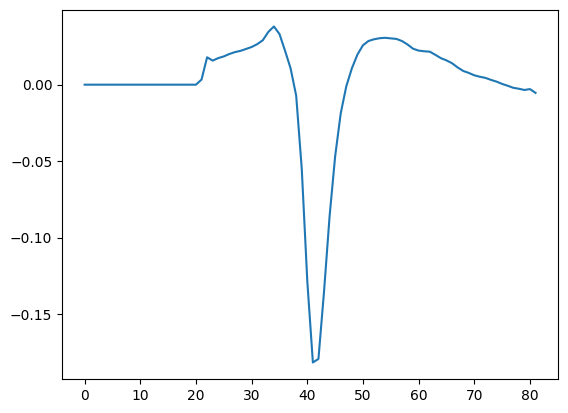

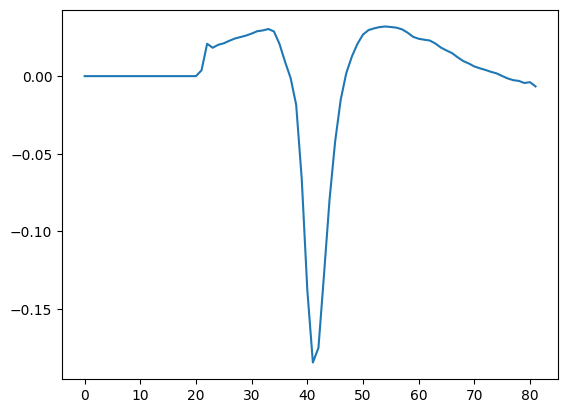

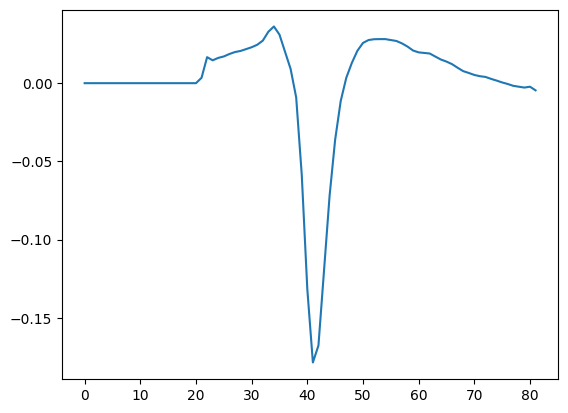

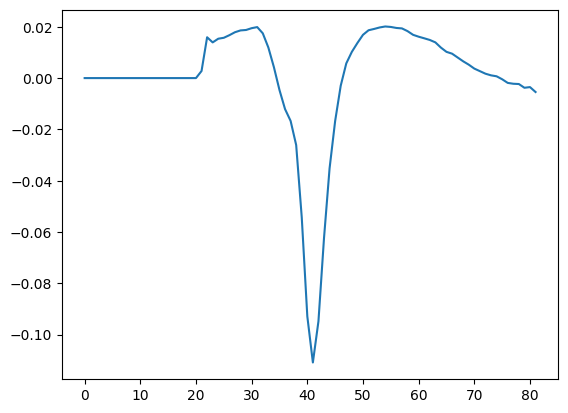

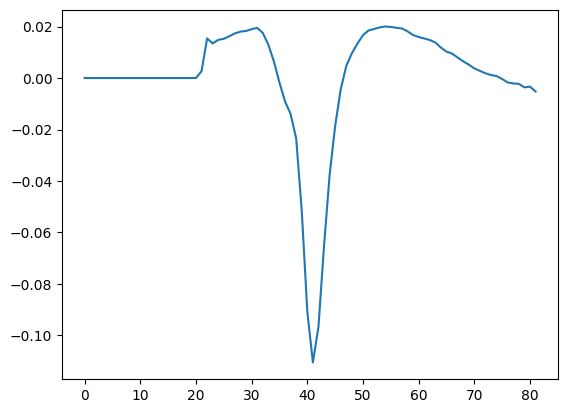

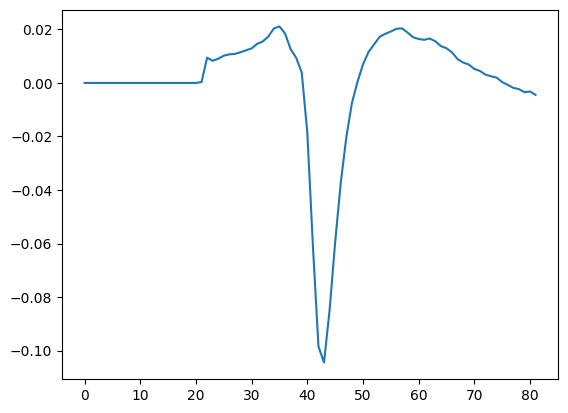

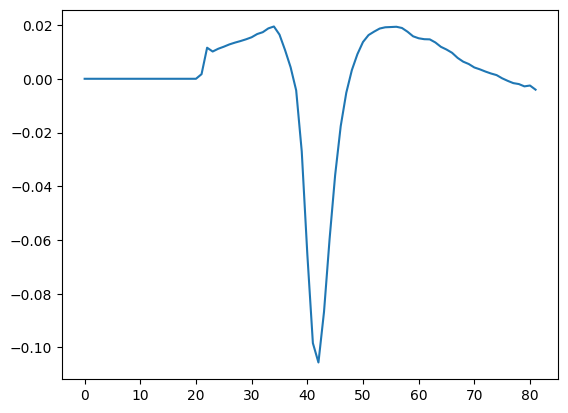

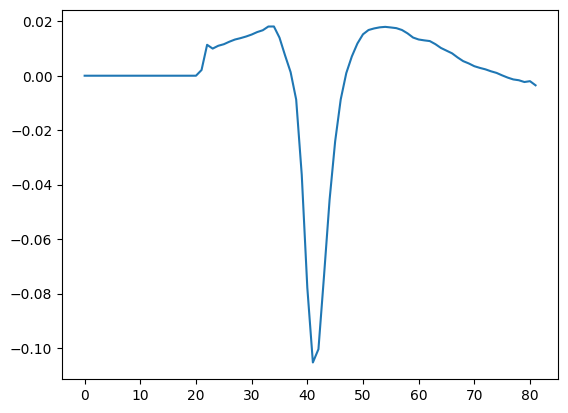

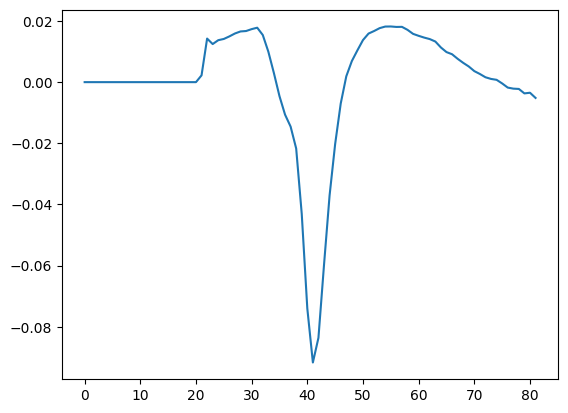

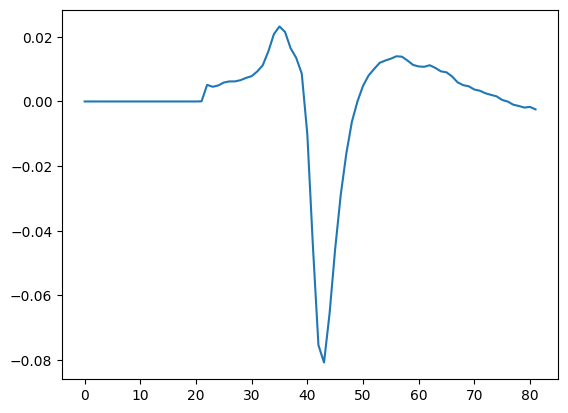

In [10]:
import matplotlib.pyplot as plt
for i in range(10):
    for temp in spike_data.neuron_attributes[i].neighbor_templates:
        fig, axs = plt.subplots()
        axs.plot(temp)

In [6]:
sys.getsizeof(spike_data)

48

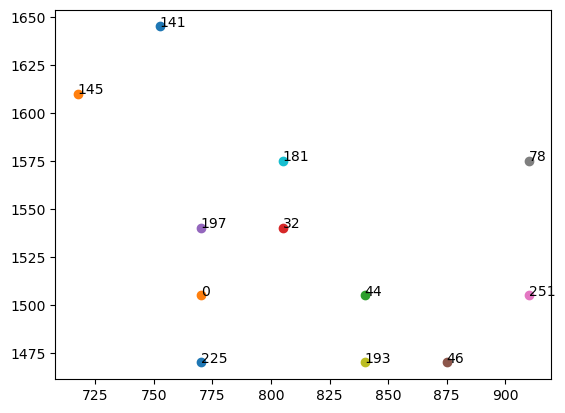

In [5]:
import numpy as np
import matplotlib.pyplot as plt
positions = np.array(spike_data.neuron_attributes[1].neighbor_positions)
channels = spike_data.neuron_attributes[1].neighbor_channels
for i in range(12):
    plt.scatter(positions[i][0], positions[i][1])
    plt.text(positions[i][0], positions[i][1], str(channels[i]))

In [1]:
import random as RND
fnx = lambda: RND.randint(0, 10)
data = [ (fnx(), fnx()) for c in range(10) ]
target = (2, 4)

import math
def euclid_dist(v1, v2):
    x1, y1 = v1
    x2, y2 = v2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


In [3]:
import functools
p_euclid_dist = functools.partial(euclid_dist, target)

In [4]:
p_euclid_dist(data[0])

4.123105625617661

In [5]:
data.sort(key=p_euclid_dist)

In [8]:
def power(v1, v2):
    return v1**v2

p_power = functools.partial(power, v2=3)
p_power(2)

8

In [4]:
from braingeneers.utils import s3wrangler
files = s3wrangler.list_objects("s3://braingeneers/ephys/2023-05-15-e-umass-Pak_ASD_PL10-16/original/data/")
print(len(files))

112


In [4]:
test_path = "s3://braingeneers/ephys/2023-03-13-e-umass-Pak_ASD_Pair_1"\
    "/derived/kilosort2/14170_C3141a_d56_Tri.h5_phy.zip"
spike_data = analysis.read_phy_files(test_path)

In [5]:
test_path = "/media/kang/Seagate_External/disk_backup/umass/14170_C3141a_d56_Tri.h5_phy.zip"
spike_data = analysis.read_phy_files(test_path)

In [93]:
# filter test
from scipy import signal
def butter_filter(data, lowcut=None, highcut=None, fs=20000.0, order=5):
    """
    A digital butterworth filter. Type is based on input value.
    Inputs: 
        data: array_like data to be filtered
        lowcut: low cutoff frequency. If None or 0, highcut must be a number.
                Filter is lowpass.
        highcut: high cutoff frequency. If None, lowpass must be a non-zero number.
                 Filter is highpass. 
        If lowcut and highcut are both give, this filter is bandpass.
        In this case, lowcut must be smaller than highcut.  
        fs: sample rate
        order: order of the filter
    Return: 
        The filtered output with the same shape as data
    """
    
    assert (lowcut not in [None, 0]) or (highcut != None), \
        "Need at least a low cutoff (lowcut) or high cutoff (highcut) frequency!"
    if (lowcut != None) and (highcut != None):
        assert lowcut < highcut, "lowcut must be smaller than highcut"
    
    if lowcut == None or lowcut == 0:
        filter_type = 'lowpass'
        Wn = highcut/fs*2
    elif highcut == None:
        filter_type = 'highpass'
        Wn = lowcut/fs*2
    else:
        filter_type = "bandpass"
        band = [lowcut, highcut]
        Wn = [e/fs*2 for e in band]

    filter_coeff = signal.iirfilter(order, Wn, analog=False, btype=filter_type, output='sos')
    filtered_traces = signal.sosfiltfilt(filter_coeff, data)
    return filtered_traces

In [92]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
n = 201
t = np.linspace(0, 1, n)
x = 1 + (t < 50) - 25*t**2 + 5*rng.standard_normal(n)
print(x.shape)

fx = butter_filter(x, 10, 200)

# w, h = signal.sosfreqz(coeff,worN=20000)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.semilogx(w / (np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
# ax.set_title('Butter frequency response')
# ax.set_xlabel('Frequency [Hz]')
# ax.set_ylabel('Amplitude [dB]')
# # ax.axis((10, 1000, -100, 10))
# ax.grid(which='both', axis='both')
# ax.axvline(x=0.001)
# ax.axvline(x=0.02)
# plt.show()



(201,)


IndexError: tuple index out of range

In [66]:
test = None
if isinstance(test, None):
    print("pass")

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union